<a href="https://colab.research.google.com/github/eunzzae/FC_Project_essay/blob/main/ML%EC%BA%90%EA%B8%80%ED%94%8C%EC%A0%9D_%EC%97%90%EC%84%B8%EC%9D%B4%ED%92%88%EC%A7%88%EC%98%88%EC%B8%A1_EDA_v1_musthave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_path = '/content/drive/MyDrive/Colab Notebooks/data/essay_quality/'

train_l = pd.read_csv(data_path+'train_logs.csv', index_col='id')
train_s = pd.read_csv(data_path+'train_scores.csv', index_col='id')
test = pd.read_csv(data_path+'test_logs.csv', index_col='id')
submission = pd.read_csv(data_path+'sample_submission.csv', index_col='id')


# 1. 데이터 둘러보기

In [ ]:
train_l.shape , train_s.shape , test.shape

((8405898, 10), (2471, 1), (6, 10))

In [ ]:
train_l.head()

,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
id,,,,,,,,,,
001519c8,1,4526,4557,31,Nonproduction,Leftclick,Leftclick,NoChange,0,0
001519c8,2,4558,4962,404,Nonproduction,Leftclick,Leftclick,NoChange,0,0
001519c8,3,106571,106571,0,Nonproduction,Shift,Shift,NoChange,0,0
001519c8,4,106686,106777,91,Input,q,q,q,1,1
001519c8,5,107196,107323,127,Input,q,q,q,2,1


In [ ]:
train_s.head()

,score
id,
001519c8,3.5
0022f953,3.5
0042269b,6.0
0059420b,2.0
0075873a,4.0


In [ ]:
test.head()

,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
id,,,,,,,,,,
0000aaaa,1,338433,338518,85,Input,Space,Space,,0,0
0000aaaa,2,760073,760160,87,Input,Space,Space,,1,0
2222bbbb,1,711956,712023,67,Input,q,q,q,0,1
2222bbbb,2,290502,290548,46,Input,q,q,q,1,1
4444cccc,1,635547,635641,94,Input,Space,Space,,0,0


In [ ]:
submission.head()

,score
id,
0000aaaa,1.0
2222bbbb,2.0
4444cccc,3.0


In [ ]:
train_l.info(verbose=True, null_counts=True) # null값이 안보여서 파라미터 지정

<ipython-input-31-2b77d6e5279c>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  train_l.info(verbose=True, null_counts=True) # null값이 안보여서 파라미터 지정


<class 'pandas.core.frame.DataFrame'>
Index: 8405898 entries, 001519c8 to fff05981
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   event_id         8405898 non-null  int64 
 1   down_time        8405898 non-null  int64 
 2   up_time          8405898 non-null  int64 
 3   action_time      8405898 non-null  int64 
 4   activity         8405898 non-null  object
 5   down_event       8405898 non-null  object
 6   up_event         8405898 non-null  object
 7   text_change      8405898 non-null  object
 8   cursor_position  8405898 non-null  int64 
 9   word_count       8405898 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 705.5+ MB


In [ ]:
train_s.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2471 entries, 001519c8 to fff05981
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   2471 non-null   float64
dtypes: float64(1)
memory usage: 38.6+ KB


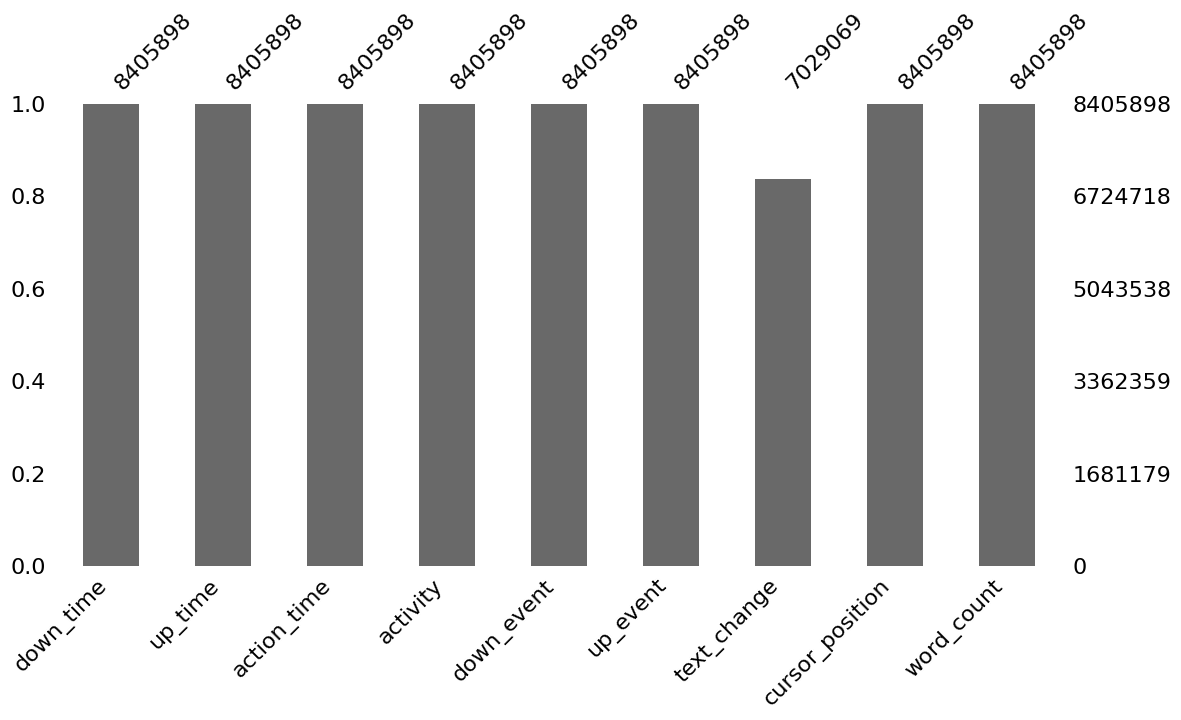

In [ ]:
import missingno as msno # 결측값을 시각화하는 패키지

# 훈련 데이터 복사본에서 -1을 np.NaN로 변환
train_l_copy = train_l.copy().replace(" ", np.NaN)

# 결측값 시각화
msno.bar(df=train_l_copy.iloc[:, 1:10], figsize=(13, 6));

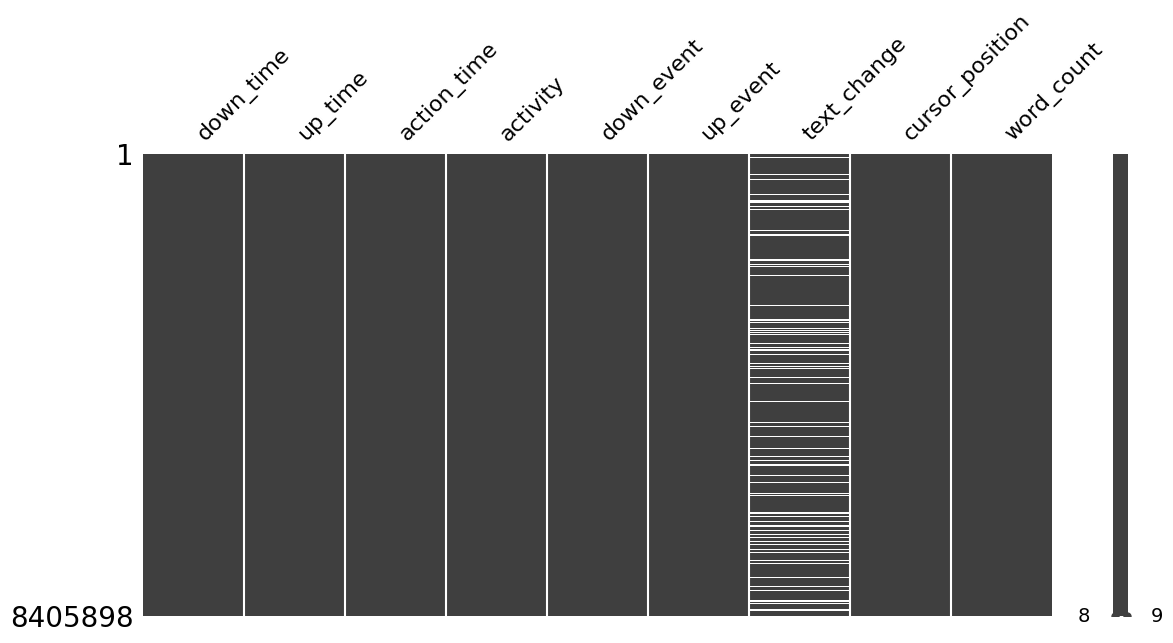

In [ ]:
msno.matrix(df=train_l_copy.iloc[:, 1:10], figsize=(13, 6)); # matrix 타입으로 결측값 시각화(결측값 없는 열 개수 : 8, 전체 열 개수 : 9)

## 1) 피처요약표

In [ ]:
def resumetable(df):
  print(f'데이터 세트 형상: {df.shape}')
  summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
  summary = summary.reset_index()
  summary = summary.rename(columns={'index':'피처'})
  summary['결측값 개수'] = df.isnull().sum().values
  summary['고윳값 개수'] = df.nunique().values

  # 고윳값 한번에 출력하기
  unique_feature = []
  for i in range(len(df.columns)):
    feature = train_l.columns[i]
    unique_feature.append(train_l[feature].unique())
  summary['고윳값'] = unique_feature

  return summary

resumetable(train_l)

데이터 세트 형상: (8405898, 10)


,피처,데이터 타입,결측값 개수,고윳값 개수,고윳값
0,event_id,int64,0,12876,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,down_time,int64,0,1836078,"[4526, 4558, 106571, 106686, 107196, 107296, 1..."
2,up_time,int64,0,1835993,"[4557, 4962, 106571, 106777, 107323, 107400, 1..."
3,action_time,int64,0,3509,"[31, 404, 0, 91, 127, 104, 107, 109, 138, 187,..."
4,activity,object,0,50,"[Nonproduction, Input, Remove/Cut, Replace, Mo..."
5,down_event,object,0,131,"[Leftclick, Shift, q, Space, Backspace, ., ,, ..."
6,up_event,object,0,130,"[Leftclick, Shift, q, Space, Backspace, ., ,, ..."
7,text_change,object,0,4111,"[NoChange, q, , ., ,, qqq qqqqq => , qqqqq..."
8,cursor_position,int64,0,7803,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
9,word_count,int64,0,1327,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."


# 2. 데이터 시각화

In [ ]:
import matplotlib as mpl
%matplotlib inline

In [ ]:
def write_percent(ax, total_size):
  '''도형 객체를 순회하며 막대 그래프 상단에 타깃값 비율 표시'''
  for patch in ax.patches:
    height = patch.get_height()         # 도형 높이(데이터 개수)
    width = patch.get_width()           # 도형 너비
    left_coord = patch.get_x()          # 도형 왼쪽 테두리의 x축 위치
    percent = height/total_size*100     # 타깃값 비율

    # (x, y) 좌표에 텍스트 입력
    ax.text(left_coord + width/2.0,     # x축 위치
            height + total_size*0.001,  # y축 위치
            '{:1.1f}%'.format(percent), # 입력 테스트
            ha='center')                # 가운데 정렬

mpl.rc('font', size=15)
plt.figure(figsize=(7,6))

ax = sns.countplot(x='target', data=train_l)
write_percent(ax, len(train_l))           # 비율 표시
ax.set_title('Target Distribution');

ValueError: ignored

<Figure size 700x600 with 0 Axes>